<a href="https://colab.research.google.com/github/Astarosa-MM/Plant-Classifier-Model/blob/main/Plant_Species_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Copied 495 images to /content/drive/MyDrive/plant_classifier_dataset/balanced_flowers/sunflower
Copied 495 images to /content/drive/MyDrive/plant_classifier_dataset/balanced_flowers/rose
Copied 495 images to /content/drive/MyDrive/plant_classifier_dataset/balanced_flowers/dandelion
Copied 495 images to /content/drive/MyDrive/plant_classifier_dataset/balanced_flowers/daisy
Copied 495 images to /content/drive/MyDrive/plant_classifier_dataset/balanced_flowers/tulip
Classes found: ['sunflower', 'rose', 'dandelion', 'daisy', 'tulip']
sunflower: 495 images
rose: 495 images
dandelion: 495 images
daisy: 495 images
tulip: 495 images
Found 1980 images belonging to 5 classes.
Found 495 images belonging to 5 classes.
Loading existing model...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.8782 - loss: 0.3512 - val_accuracy: 0.8707 - val_loss: 0.3814
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.8689 - loss: 0.3641 - val_accuracy: 0.8485 - val_loss: 0.3855
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 158s 3s/step - accuracy: 0.8855 - loss: 0.3220 - val_accuracy: 0.8768 - val_loss: 0.3643
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.8746 - loss: 0.3574 - val_accuracy: 0.8566 - val_loss: 0.3694
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 157s 3s/step - accuracy: 0.8728 - loss: 0.3634 - val_accuracy: 0.8646 - val_loss: 0.3767
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.8639 - loss: 0.3756 - val_accuracy: 0.8626 - val_loss: 0.3764
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.8774 - loss: 0.3439 - val_accuracy: 0.8768 - val_loss: 0.3445
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.8826 - loss: 0.3256 - val_accuracy: 0.8768 - v

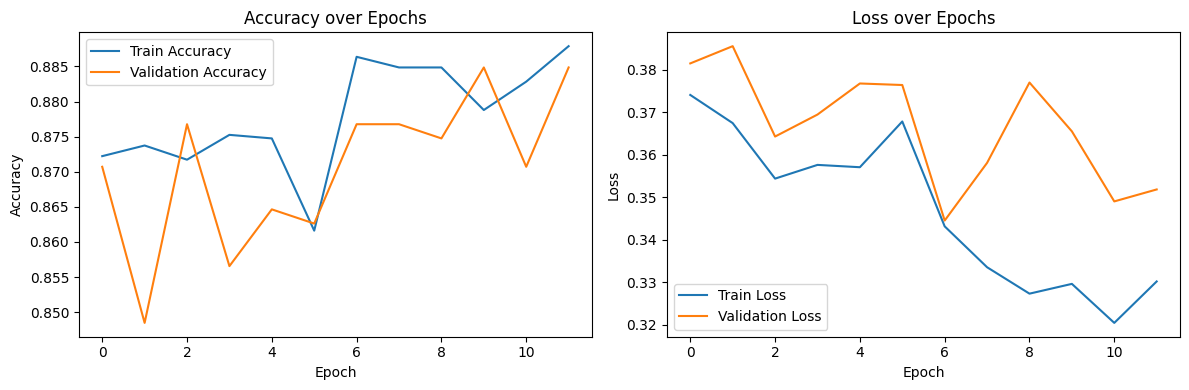

16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.8830 - loss: 0.3595

Validation Accuracy: 0.8869
Validation Loss: 0.3537
16/16 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step

Classification Report:
              precision    recall  f1-score   support

       daisy       0.22      0.24      0.23        99
   dandelion       0.18      0.16      0.17        99
        rose       0.22      0.22      0.22        99
   sunflower       0.26      0.25      0.26        99
       tulip       0.17      0.17      0.17        99

    accuracy                           0.21       495
   macro avg       0.21      0.21      0.21       495
weighted avg       0.21      0.21      0.21       495



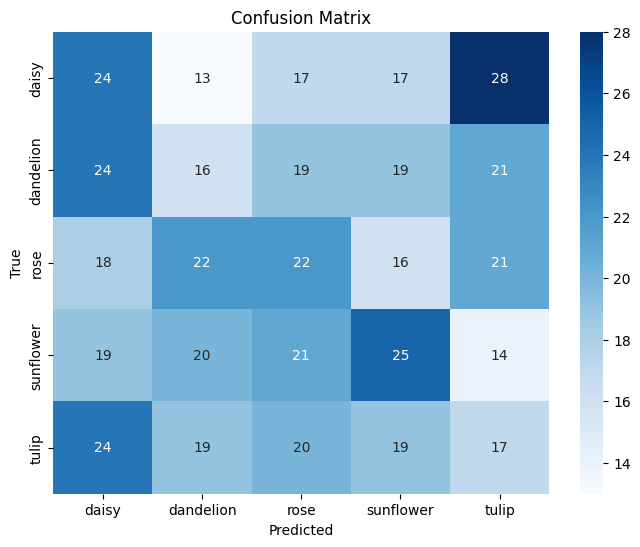

In [16]:
# Plant Species Classifier

from google.colab import drive
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import random
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Balancing the dataset
original_base = "/content/drive/MyDrive/plant_classifier_dataset/train"
balanced_base = "/content/drive/MyDrive/plant_classifier_dataset/balanced_flowers"

os.makedirs(balanced_base, exist_ok=True)
target_count = 495  # Inputting dataset's smallest category size

for class_name in os.listdir(original_base):
    class_path = os.path.join(original_base, class_name)
    image_files = os.listdir(class_path)
    selected_images = random.sample(image_files, target_count)

    dest_class_path = os.path.join(balanced_base, class_name)
    os.makedirs(dest_class_path, exist_ok=True)

    for img_file in selected_images:
        src = os.path.join(class_path, img_file)
        dst = os.path.join(dest_class_path, img_file)
        shutil.copy2(src, dst)

    print(f"Copied {len(selected_images)} images to {dest_class_path}")

# Define dataset path
base_dir = balanced_base

# Inspect classes
class_folders = os.listdir(base_dir)
print("Classes found:", class_folders)
for class_name in class_folders:
    class_path = os.path.join(base_dir, class_name)
    num_images = len(os.listdir(class_path))
    print(f"{class_name}: {num_images} images")

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load or build model
model_path = "plant_species_classifier.h5"
if os.path.exists(model_path):
    print("Loading existing model...")
    model = load_model(model_path)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
else:
    print("Building new model...")
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    predictions = Dense(train_generator.num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Train or continue training
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stop]
)

# Save the model
model.save(model_path)

# Plot training results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Classification report
eval_loss, eval_acc = model.evaluate(val_generator)
print(f"\nValidation Accuracy: {eval_acc:.4f}")
print(f"Validation Loss: {eval_loss:.4f}")

y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()